In [1]:
import os

import numpy as np
import pandas as pd

from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import numpy

%matplotlib inline

In [2]:
event_prefix = 'event000001000'
hits, cells, particles, truth = load_event( 'train_sample/train_100_events/' + event_prefix)

mem_bytes = (hits.memory_usage(index=True).sum() 
             + cells.memory_usage(index=True).sum() 
             + particles.memory_usage(index=True).sum() 
             + truth.memory_usage(index=True).sum())
print('{} memory usage {:.2f} MB'.format(event_prefix, mem_bytes / 2**20))

event000001000 memory usage 18.46 MB


In [5]:
import trackml

In [6]:
event_prefix = 'event000001000'
hits, cells, particles, truth = load_event( 'train_sample/train_100_events/' + event_prefix)

hits_sorted = hits.set_index('hit_id')
cells_sorted = cells.set_index('hit_id')

truth_sorted = truth.set_index('hit_id')
y  = truth_sorted['particle_id']


all_X = hits_sorted.join(cells_sorted)
all_data = all_X.join(y)
y = (all_data['particle_id'].values)

In [66]:
truth[truth['particle_id'] == 0]

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-64.411598,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.0,0.0
2,3,0,-83.828003,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.0,0.0
11,12,0,-42.617699,-10.666100,-1502.5,-270443.000000,83056.703125,-959147.0,0.0
30,31,0,-152.171005,-23.806400,-1498.0,339705.000000,-13076.400391,-940441.0,0.0
48,49,0,-108.177002,-20.438000,-1502.0,-484376.000000,-559731.000000,-672370.0,0.0
80,81,0,-122.228996,-39.904598,-1498.0,-348771.000000,134342.000000,-927529.0,0.0
95,96,0,-120.168999,-46.182098,-1502.0,510661.000000,171042.000000,-842597.0,0.0
111,112,0,-60.087101,-45.659302,-1497.5,-551643.000000,-197642.000000,-810325.0,0.0
119,120,0,-36.352100,-13.115700,-1497.5,-554127.000000,95545.398438,-826931.0,0.0
136,137,0,-131.354004,-98.576401,-1502.0,153028.000000,246426.000000,-957004.0,0.0


In [11]:
particles[ particles['particle_id'] == 67554612885848064 ]

,particle_id,vx,vy,vz,px,py,pz,q,nhits
1201,67554612885848064,0.01608,-0.000599,2.29984,-0.214661,0.000162,-5.56808,-1,13


In [12]:
all_data[ all_data['particle_id'] == 67554612885848064 ]

,hit_id,x,y,z,volume_id,layer_id,module_id,ch0,ch1,value,particle_id
28,16,-57.311901,-5.08732,-1502.5,7,2,1,179,489,0.346271,67554612885848064
2427,1471,-49.800400,-3.74384,-1302.5,7,4,1,164,354,0.285936,67554612885848064
2470,1503,-49.656700,-3.71992,-1298.0,7,4,4,8,340,0.314397,67554612885848064
5286,3178,-49.655899,-3.74057,-1297.5,7,4,106,320,341,0.344883,67554612885848064
5346,3217,-42.291599,-2.65133,-1102.5,7,6,1,154,220,0.129953,67554612885848064
5347,3217,-42.291599,-2.65133,-1102.5,7,6,1,154,219,0.197023,67554612885848064
5490,3307,-42.109402,-2.62785,-1098.0,7,6,4,22,205,0.309767,67554612885848064
8858,5354,-42.120399,-2.62837,-1097.5,7,6,106,286,209,0.303439,67554612885848064
8929,5399,-36.965599,-1.93124,-962.5,7,8,1,148,124,0.301312,67554612885848064
9032,5455,-36.784901,-1.91518,-958.0,7,8,4,33,110,0.259446,67554612885848064


In [8]:
all_data

,hit_id,x,y,z,volume_id,layer_id,module_id,ch0,ch1,value,particle_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1,209,617,0.013832,0
1,1,-64.409897,-7.163700,-1502.5,7,2,1,210,617,0.079887,0
2,1,-64.409897,-7.163700,-1502.5,7,2,1,209,618,0.211723,0
3,2,-55.336102,0.635342,-1502.5,7,2,1,68,446,0.334087,22525763437723648
4,3,-83.830498,-1.143010,-1502.5,7,2,1,58,954,0.034005,0
5,3,-83.830498,-1.143010,-1502.5,7,2,1,58,956,0.007798,0
6,3,-83.830498,-1.143010,-1502.5,7,2,1,60,951,0.019897,0
7,3,-83.830498,-1.143010,-1502.5,7,2,1,58,955,0.099964,0
8,3,-83.830498,-1.143010,-1502.5,7,2,1,59,952,0.065576,0
9,3,-83.830498,-1.143010,-1502.5,7,2,1,60,952,0.018697,0


In [7]:
all_data = all_data.reset_index()

In [26]:
phits_ = all_data.loc[(all_data['particle_id'] == 22525763437723648)]

In [28]:
plt.sc phits_['value']

,hit_id,x,y,z,volume_id,layer_id,module_id,ch0,ch1,value,particle_id
3,2,-55.336102,0.635342,-1502.5,7,2,1,68,446,0.334087,22525763437723648
2343,1420,-55.162201,0.604841,-1497.5,7,2,106,242,444,0.117364,22525763437723648
2344,1420,-55.162201,0.604841,-1497.5,7,2,106,242,445,0.216680,22525763437723648
2406,1460,-47.975498,0.311848,-1302.5,7,4,1,86,316,0.327937,22525763437723648
5264,3170,-47.812302,0.327322,-1297.5,7,4,106,236,314,0.297341,22525763437723648
5365,3234,-40.622799,0.088046,-1102.5,7,6,1,102,186,0.257461,22525763437723648
8845,5343,-40.438801,0.098098,-1097.5,7,6,106,229,183,0.281778,22525763437723648
8969,5424,-35.480598,-0.008800,-962.5,7,8,1,112,95,0.348640,22525763437723648
9070,5482,-35.330101,-0.023294,-958.0,7,8,4,3,77,0.240534,22525763437723648
13074,7867,-35.312302,-0.004440,-957.5,7,8,106,223,92,0.304248,22525763437723648


In [58]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

xs = all_data[ all_data['particle_id'] == 0 ]['x']
ys = all_data[ all_data['particle_id'] == 0 ]['y']
zs = all_data[ all_data['particle_id'] == 0 ]['z']
c = all_data[ all_data['particle_id'] == 0 ]['value']

ax.scatter(xs, ys, zs)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
%matplotlib notebook

In [10]:
all_X_subsample = []
all_y_subsample = []
all_y_subsample_pid = []

i = 0
for p in np.unique(y)[:20]:
    _particle_d = all_X.loc[all_data['particle_id'] == p ].values
    print(p)
    for dd in _particle_d:
        all_X_subsample.append( dd )    
        all_y_subsample.append( i  )
        all_y_subsample_pid.append(p)
    i += 1
all_X_subsample = numpy.array(all_X_subsample)
all_y_subsample = numpy.array(all_y_subsample)

0
4503668346847232
4503737066323968
4503874505277440
4503943224754176
4504011944230912
4504080663707648
4504355541614592
4504424261091328
4504424277872641
4504561700044800
4504630419521536
4504699138998272
4504767858475008
4504905297428480
4505248894812160
4505248911593473
4505317614288896
4505386333765632
4505455053242368


In [11]:
all_y_subsample

array([ 0,  0,  0, ..., 18, 18, 18])

In [12]:
random_state = 170

kmeans = KMeans(n_clusters=7)
kmeans.fit(all_X_subsample)

y_pred = kmeans.predict(all_X_subsample)

NameError: name 'KMeans' is not defined

In [104]:
print( numpy.unique(all_y_subsample) )
print( numpy.unique(all_y_subsample_pid) )

[ 0  1  3  4  5  7  8 10 11 12 13 14 15 17 18]
[               0 4503668346847232 4503874505277440 4503943224754176
 4504011944230912 4504355541614592 4504424261091328 4504561700044800
 4504630419521536 4504699138998272 4504767858475008 4504905297428480
 4505248894812160 4505317614288896 4505386333765632]


In [63]:
numpy.unique(y_pred)

numpy.unique(all_y_subsample)

array([0, 1, 3, 4, 5, 7, 8])

In [116]:
aaa = truth.loc[truth['particle_id'] == 0]['weight']

In [40]:
pca = decomposition.PCA(n_components=2)
pca.fit( all_X_subsample )

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
particles[particles['particle_id'] == 22525763437723648]

,particle_id,vx,vy,vz,px,py,pz,q,nhits
520,22525763437723648,-0.015802,0.006381,1.16279,-0.56967,-0.011187,-15.496,1,10


In [44]:
particles

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11
2,4503805785800704,-0.009288,0.009861,-0.077879,-0.886484,0.105749,0.683881,-1,0
3,4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12
4,4503943224754176,-0.009288,0.009861,-0.077879,16.439400,-15.548900,-39.824902,1,3
5,4504011944230912,-0.009288,0.009861,-0.077879,0.795277,-1.685200,-3.520890,1,12
6,4504080663707648,-0.009288,0.009861,-0.077879,-0.563433,0.305370,6.167120,-1,14
7,4504355541614592,-0.009288,0.009861,-0.077879,-0.501267,0.049825,-0.213011,-1,17
8,4504424261091328,-0.009288,0.009861,-0.077879,-1.652120,0.453142,-0.533958,-1,12
9,4504492980568064,-0.009288,0.009861,-0.077879,0.035160,0.131420,-0.207544,1,0


In [42]:
pca.components_

array([[  3.41417897e-02,   8.89845714e-03,   9.65904362e-01,
          1.17666105e-03,  -6.98410606e-04,   2.54559115e-01,
          1.41880635e-02,  -2.79356437e-02,   5.63124944e-05],
       [ -6.82292693e-02,   6.73646525e-02,  -1.18681332e-01,
          3.00956323e-03,   6.91833594e-04,   3.53617879e-01,
          4.16362130e-02,  -9.21917898e-01,   4.31382438e-04]])

In [50]:
all_X.keys()

Index(['x', 'y', 'z', 'volume_id', 'layer_id', 'module_id', 'ch0', 'ch1',
       'value'],
      dtype='object')

In [13]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit( all_X_subsample )
X = pca.transform( all_X_subsample )

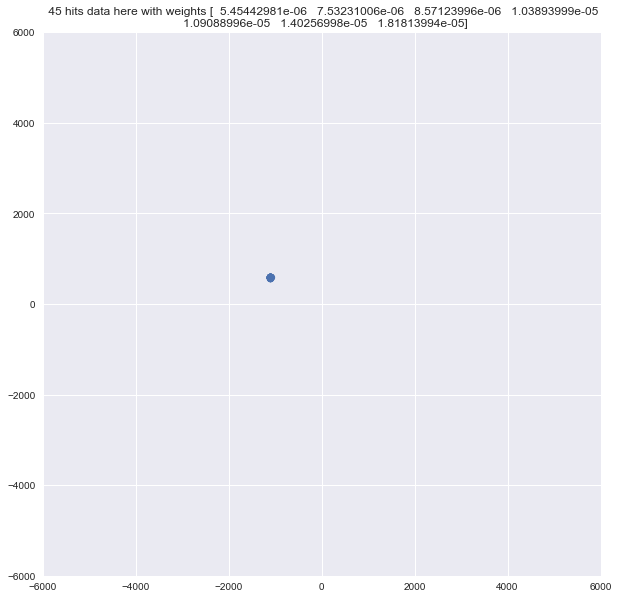

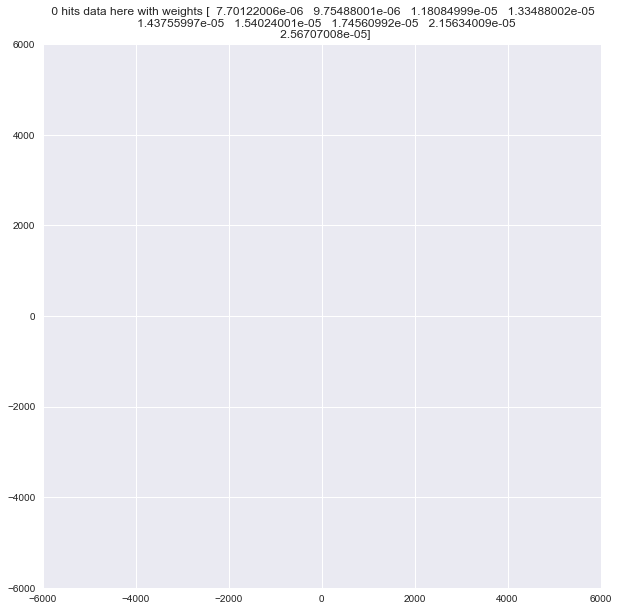

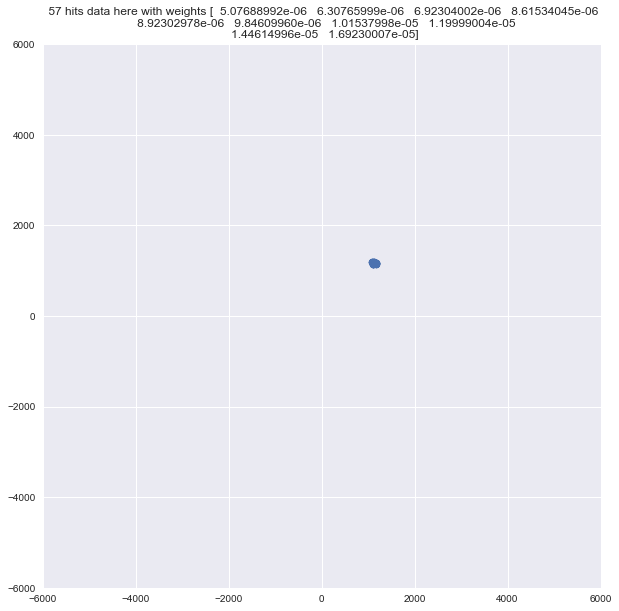

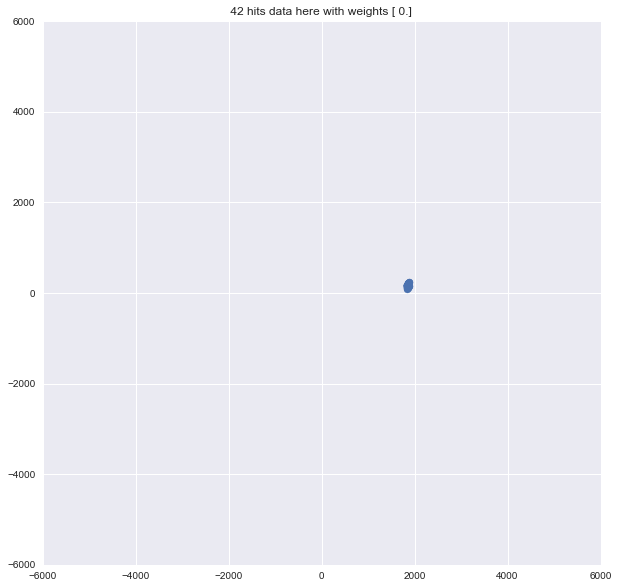

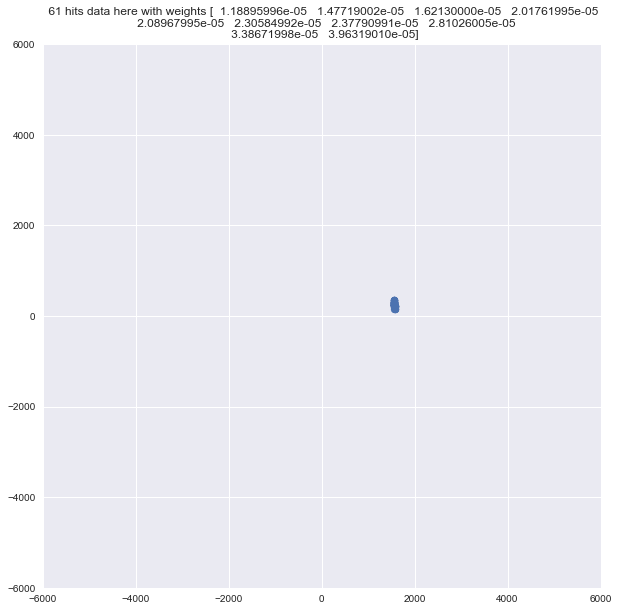

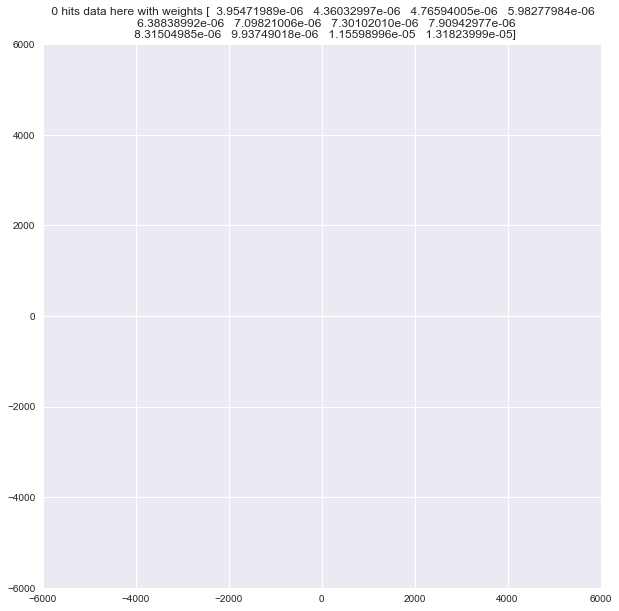

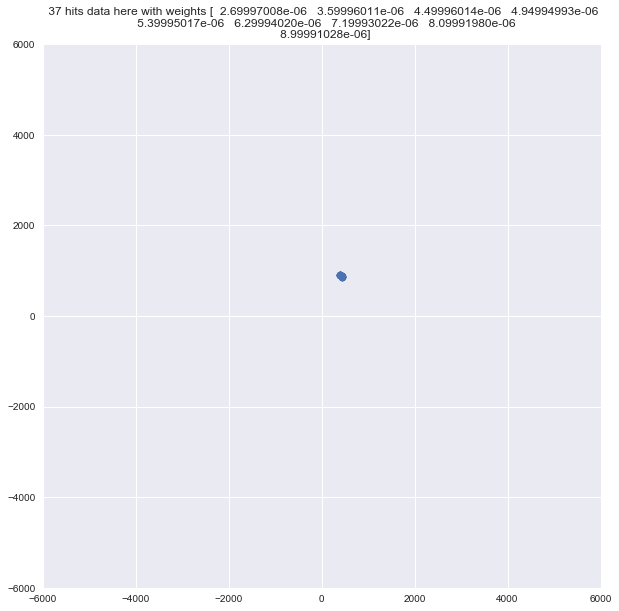

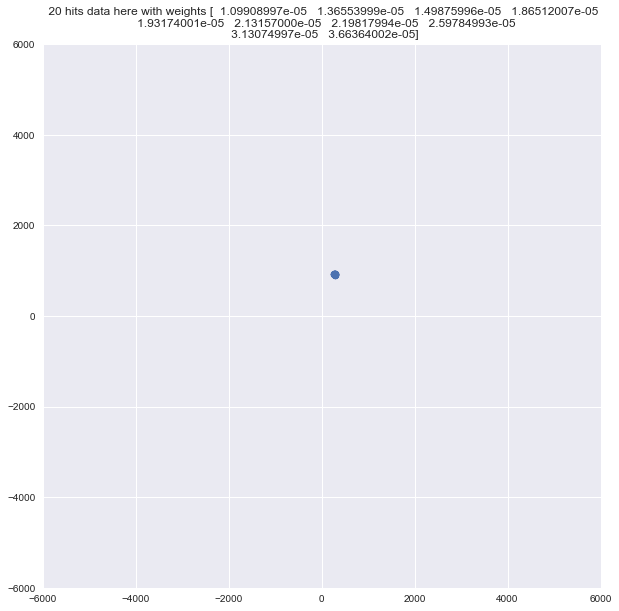

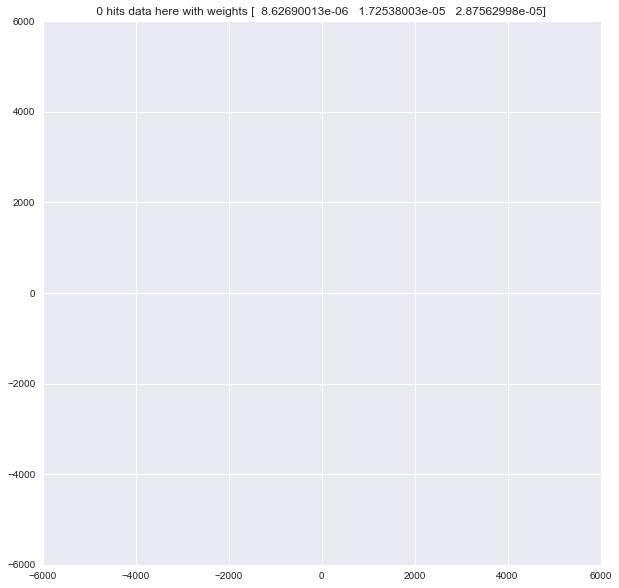

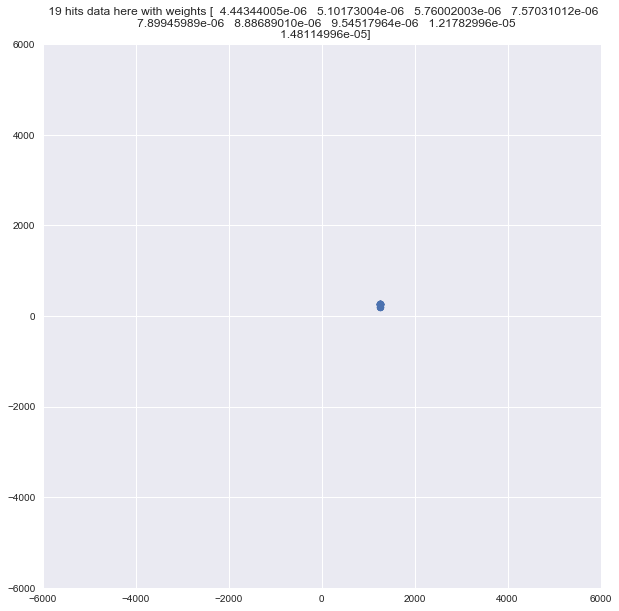

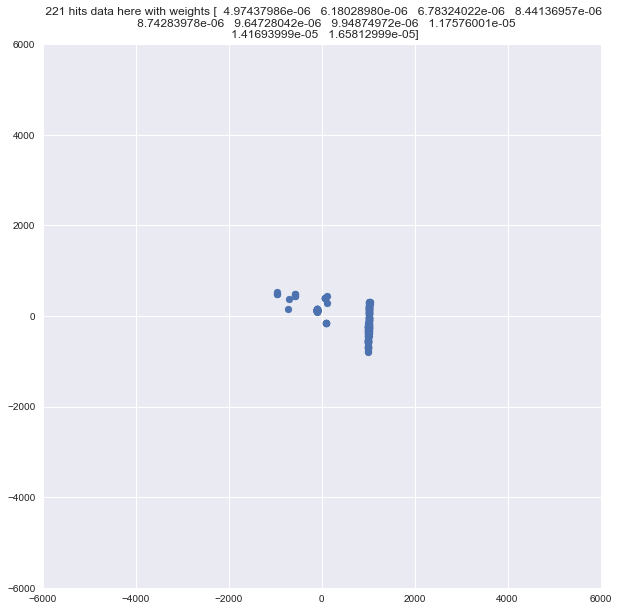

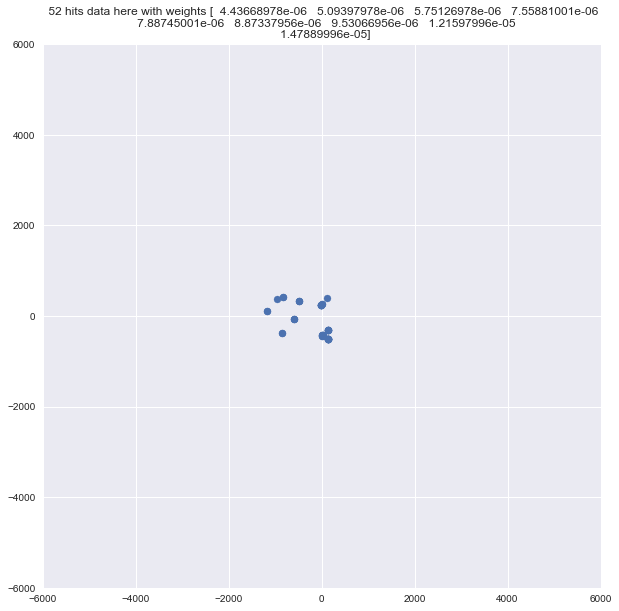

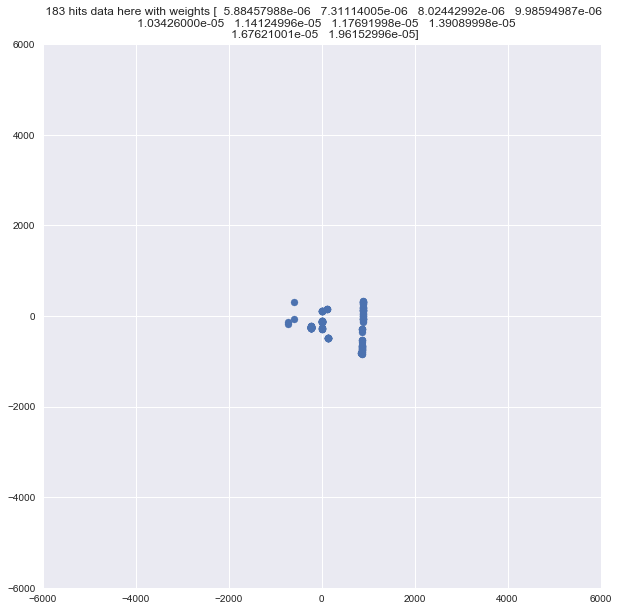

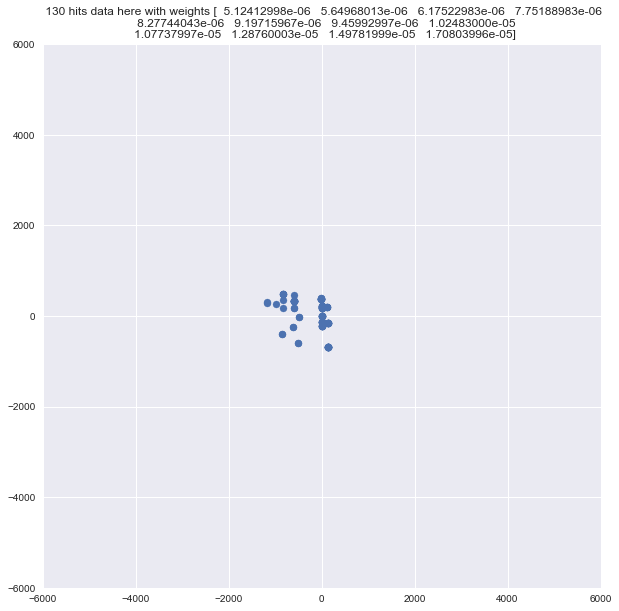

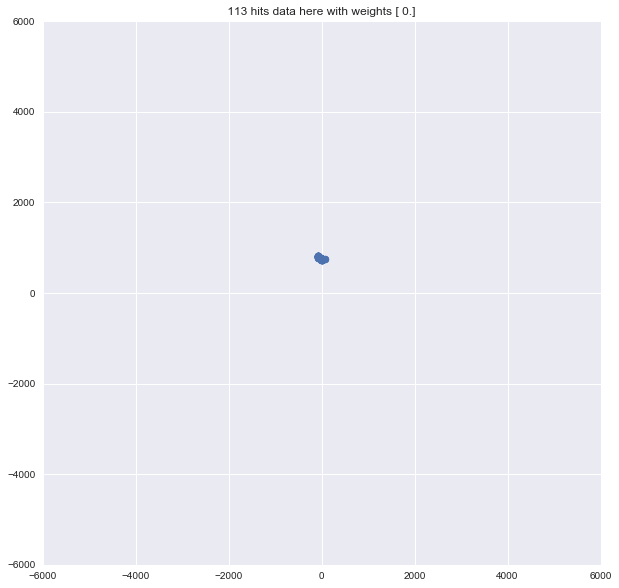

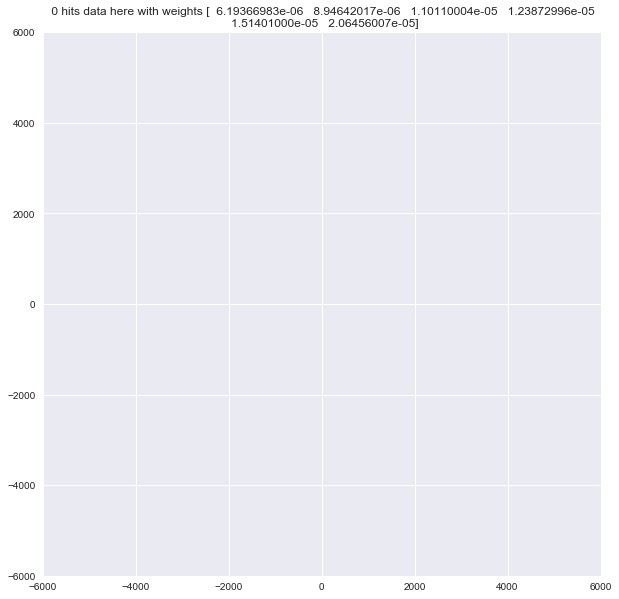

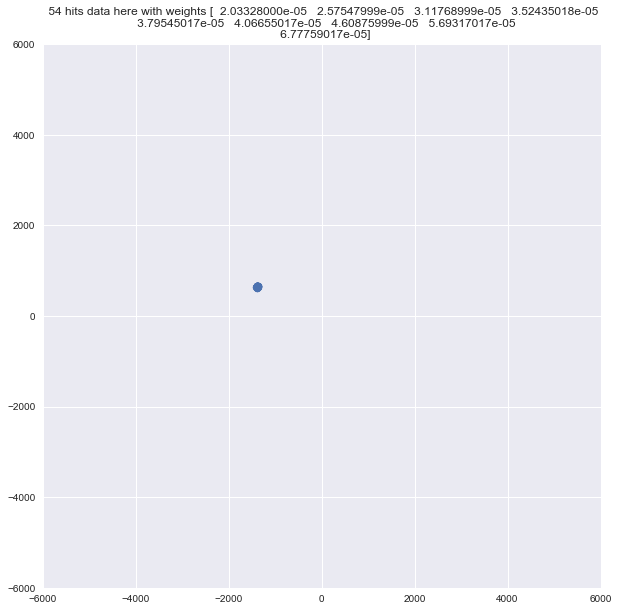

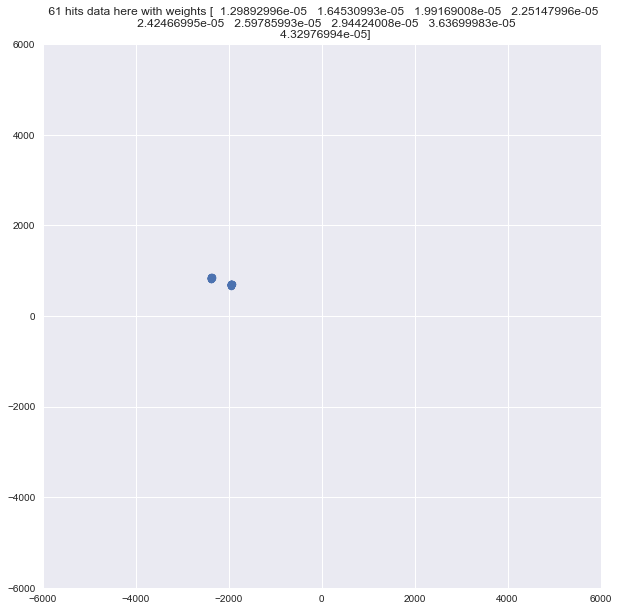

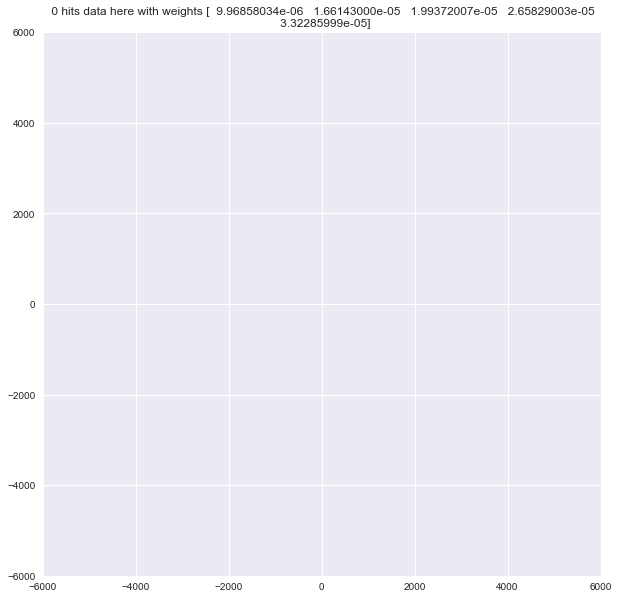

In [18]:

subsample_pid =  np.unique(y)[:20]

for i in range(1, 20):
    plt.figure(figsize=(10,10))
    
    pid = subsample_pid[i]
    
    subsample_weight = numpy.unique(truth.loc[truth['particle_id'] == pid ]['weight'])
    
    plt.title(" {} hits data here with weights {} ".format( len( X[:,0][all_y_subsample == i]), 
                                                       subsample_weight ) )
    plt.scatter( X[:,0][all_y_subsample == i] , X[:,1][all_y_subsample == i])
    plt.xlim(-6000,6000)
    plt.ylim(-6000,6000)
    plt.show()

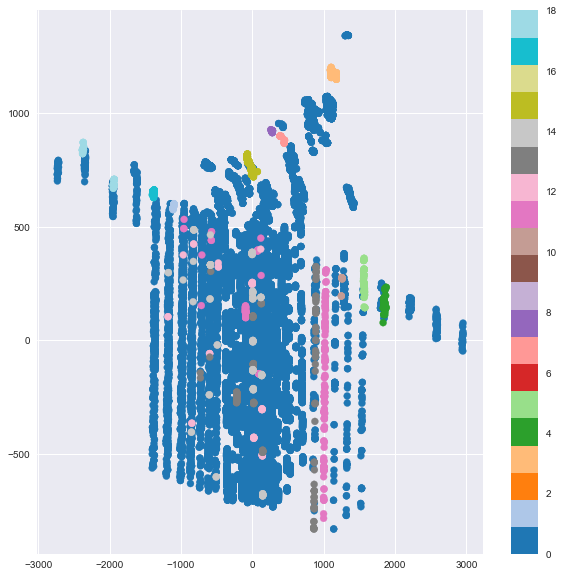

In [19]:

plt.figure(figsize=(10,10))
plt.scatter( X[1:,0] , X[1:,1], c = all_y_subsample[1:],cmap=plt.cm.tab20 )
plt.colorbar()

In [20]:
from sklearn.cluster import KMeans

In [21]:

from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)


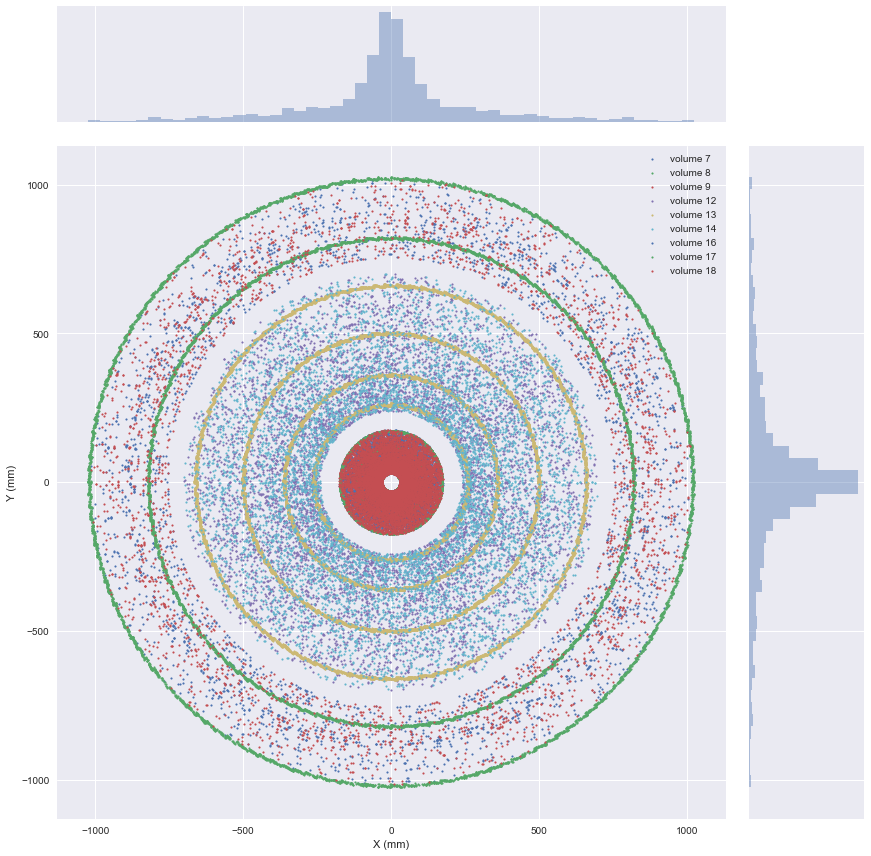

In [22]:
g = sns.jointplot(hits.x, hits.y,  s=1, size=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

volumes = hits.volume_id.unique()
for volume in volumes:
    v = hits[hits.volume_id == volume]
    plt.scatter(v.x, v.y, s=3, label='volume {}'.format(volume))

plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()

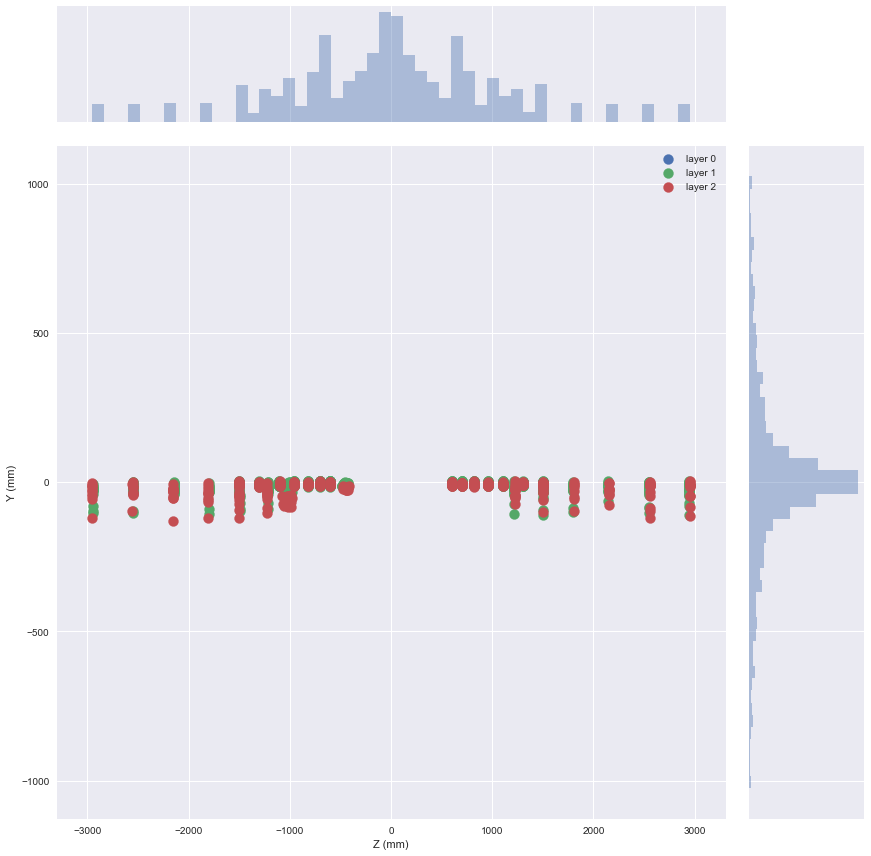

In [43]:
g = sns.jointplot(hits.z, hits.y, s=100, size=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

volumes = hits.module_id.unique()
for volume in range(3):
    v = hits[hits.module_id == volume]
    plt.scatter(v.z, v.y, s=100, label='layer {}'.format(volume))

plt.xlabel('Z (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()

#### g = sns.jointplot(particles.px, particles.py,  s=3, size=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

n_hits = particles.nhits.unique()
for n_hit in n_hits:
    p = particles[particles.nhits == n_hit]
    plt.scatter(p.px, p.py, s=3, label='Hits {}'.format(n_hit))

plt.legend()
plt.show()

In [59]:
# Get particle id with max number of hits in this event
particle = particles.loc[particles.nhits == 19].iloc[0]
particle2 = particles.loc[particles.nhits == 19].iloc[1]

# Get points where the same particle intersected subsequent layers of the observation material
p_traj_surface = truth[truth.particle_id == particle.particle_id][['tx', 'ty', 'tz']]
p_traj_surface2 = truth[truth.particle_id == particle2.particle_id][['tx', 'ty', 'tz']]

p_traj = (p_traj_surface
          .append({'tx': particle.vx, 'ty': particle.vy, 'tz': particle.vz}, ignore_index=True)
          .sort_values(by='tz'))
p_traj2 = (p_traj_surface2
          .append({'tx': particle2.vx, 'ty': particle2.vy, 'tz': particle2.vz}, ignore_index=True)
          .sort_values(by='tz'))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(
    xs=p_traj.tx,
    ys=p_traj.ty,
    zs=p_traj.tz, marker='o')
ax.plot(
    xs=p_traj2.tx,
    ys=p_traj2.ty,
    zs=p_traj2.tz, marker='o')

ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z  (mm) -- Detection layers')
plt.title('Trajectories of two particles as they cross the detection surface ($Z$ axis).')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
particle = particles.loc[particles.nhits == 19].iloc[0]
particle2 = particles.loc[particles.nhits == 19].iloc[1]



In [53]:
p1id = particle['particle_id']

In [58]:
hits[ hits.vx  == particle.tx ]

AttributeError: 'DataFrame' object has no attribute 'vx'

0         -0.009288
1         -0.009288
2         -0.009288
3         -0.009288
4         -0.009288
5         -0.009288
6         -0.009288
7         -0.009288
8         -0.009288
9         -0.009288
10        -0.009288
11        -0.009288
12        -0.009288
13        -0.009288
14        -0.009288
15        -0.009288
16        -0.009288
17        -0.009288
18        -0.009288
19        -0.009288
20        -0.009288
21        -0.009288
22        -0.009288
23        -0.009288
24        -0.009288
25        -0.009288
26        -0.009288
27        -0.009288
28        -0.009288
29        -0.009288
            ...    
12233     -0.004178
12234     -0.004178
12235     -0.004178
12236     -0.004178
12237     -0.004178
12238     -0.004178
12239    638.362000
12240    638.362000
12241    638.362000
12242     -0.004178
12243     -0.004178
12244     -0.004178
12245     -0.004178
12246     -0.004178
12247     -0.004178
12248     -0.004178
12249     -0.004178
12250     -0.004178
12251     -0.004178


In [30]:
hits.layer_id

0          2
1          2
2          2
3          2
4          2
5          2
6          2
7          2
8          2
9          2
10         2
11         2
12         2
13         2
14         2
15         2
16         2
17         2
18         2
19         2
20         2
21         2
22         2
23         2
24         2
25         2
26         2
27         2
28         2
29         2
          ..
120909    12
120910    12
120911    12
120912    12
120913    12
120914    12
120915    12
120916    12
120917    12
120918    12
120919    12
120920    12
120921    12
120922    12
120923    12
120924    12
120925    12
120926    12
120927    12
120928    12
120929    12
120930    12
120931    12
120932    12
120933    12
120934    12
120935    12
120936    12
120937    12
120938    12
Name: layer_id, Length: 120939, dtype: int32

(array([    163.,     321.,     454.,     720.,    9821.,  107800.,
            742.,     460.,     292.,     166.]),
 array([-5.10797119, -4.09127197, -3.07457275, -2.05787354, -1.04117432,
        -0.0244751 ,  0.99222412,  2.00892334,  3.02562256,  4.04232178,
         5.059021  ]),
 <a list of 10 Patch objects>)

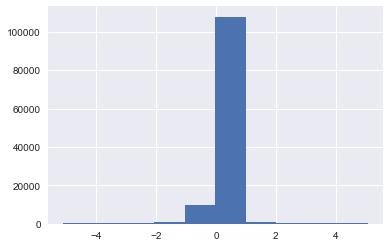

In [66]:
hits

In [67]:
truth

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-64.411598,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.000000,0.000000
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.492200,0.000010
2,3,0,-83.828003,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.000000,0.000000
3,4,297237712845406208,-96.122902,-8.230360,-1502.5,-0.225235,-0.050968,-3.702320,0.000008
4,5,418835796137607168,-62.659401,-9.375040,-1502.5,-0.281806,-0.023487,-6.573180,0.000009
5,6,108087696726949888,-57.085602,-8.189710,-1502.5,-0.401129,-0.035276,-10.466900,0.000008
6,7,968286151951515648,-73.860802,-2.575860,-1502.5,-0.442662,-0.036969,-9.130100,0.000007
7,8,954766419537428480,-63.851200,-10.875400,-1502.5,-0.670459,-0.092609,-15.540700,0.000011
8,9,707072769359085568,-97.248901,-10.906700,-1502.5,-0.279789,-0.062143,-4.412920,0.000008
9,10,67554956483231744,-90.276299,-3.243970,-1502.5,-0.251752,-0.037138,-4.249220,0.000006


In [44]:
import matplotlib.pyplot as plt

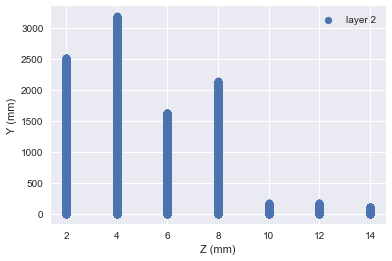

In [49]:

plt.scatter( hits.layer_id , hits.module_id, label='layer {}'.format(volume))


plt.legend()
plt.show()

In [59]:
hits.keys()

Index(['hit_id', 'x', 'y', 'z', 'volume_id', 'layer_id', 'module_id'], dtype='object')